https://github.com/sudharsan13296/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/03.%20Gradient%20Descent%20and%20its%20variants/3.02%20Performing%20Gradient%20Descent%20in%20Regression.ipynb

#y_hat = mx + b 

we will use gradient descent to find the optimal values for m and b params

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [16]:
data = np.random.randn(500,2)

In [17]:
data[0]

array([ 0.0327444 , -0.03197004])

In [18]:
#first initialize theta with zeros
#2 => m , b params
theta = np.zeros(2)
theta

array([0., 0.])

Loss function - MSE for regression, 
j= $\sum$((y-y_hat)**2/N)

In [19]:
def loss_function(data,theta):
    #get m and b
    m = theta[0]
    b = theta[1]
    
    loss =0
    
    #cal y_hat for each row for given theta
    for i in range(0,len(data)):
        x= data[i,0]
        y=data[i,1]
        
        y_hat=m*x+b
        
        loss = loss + ((y-y_hat)**2)
        
    mse=loss/float(2* len(data))
    
    return mse
        

In [20]:
print(loss_function(data,theta))

0.4889913394478498


### Objective

Now what does this mse mean, our objective is to minimize this loss, we need to cal the gradient of the loss function J with respect to the model parameters m, b and update the parameters according to the parameter update rule. So, first we cal the gradient of the loss function

dj/dm and dj/dw

In [21]:
def compute_gradients(data,theta):
    N= float(len(data))
    
    gradients=np.zeros(2) #dj_m, dj_b
    m=theta[0]
    b=theta[1]
    
    for i in range(len(data)):
        x =data[i,0]
        y=data[i,1]

        #gradient of loss function wrt m (partial derivative wrt m)
        gradients[0] += (2/N)*-x*(y-(m*x+b))
        #gradient of loss function wrt b (partial derivative wrt b)
        gradients[1] +=(2/N)*(-(y-(m*x+b)))
        
    #add epsilon to avoid division by zero error
    
    epsilon=1e-6
    gradients=np.divide(gradients,N+epsilon)
    
    # print(f"given data with rows : {N}, and theta: {theta}, the gradient is {gradients}")
    
    return gradients
        
    
        
        

In [22]:
compute_gradients(data,theta)

array([-1.69932781e-04,  3.08034326e-05])


Update Rule

After computing the gradients, we need to update our model parameters according to the update rule
m = m - alpha (dj/dm)

b = b - alpha(dj/db)  
therefore our  becomes  
theta = [m,b]

theta = theta - alpha * (dj/d_theta) 

In [23]:
def gradient_descent(lr,num_iters):
    theta = np.zeros(2)
    loss=[]
    
    for i in range(num_iters):
        #as usual, compute the loss
    
        #then compute gradient
        gradients = compute_gradients(data,theta)
    
        #update params
        theta = theta - lr * gradients
        loss_fn=loss_function(data,theta)
        #usually we need to compute the gradient and then use that for the loss function!!
        #store the loss
        loss.append(loss_fn)
    
        # if i % math.ceil(num_iters/10) == 0:
        #     print(f'Iteration: {i:4},theta: {theta}, dm: {gradients[0]:.3e}, db: {gradients[1]:0.2e}, cost: {loss_fn:.3e}')
    print(f'Iteration: {num_iters:4},theta: {theta}, db: {gradients[1]:0.2e}, dm: {gradients[0]:.3e}, cost: {loss_fn:.3e}')
    
    return loss



In [24]:
def plot_loss_curve(loss_history, num_iterations):
    """
    Plots the loss curve generated during the Gradient Descent training process.

    Args:
        loss_history (list): A list containing the loss value recorded at each iteration.
        num_iterations (int): The total number of iterations the model was trained for.
                              (Used for the x-axis label, though len(loss_history)
                              determines the plot length.)
    """
    # Create the x-axis data: a sequence of iteration numbers
    iterations = range(1, len(loss_history) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, loss_history)

    # Add Labels
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Loss / Cost Function Value", fontsize=12)
    plt.title(f"Loss Curve (Total Iterations: {num_iterations})", fontsize=14)

    plt.grid(True)
    plt.show()


##Note  
We are not really trying any convergence, rather calculating the weights based on the num_iter times and then simply taking the max(loss)

Iteration: 3000,theta: [ 0.00483722 -0.00088726], db: 2.84e-05, dm: -1.529e-04, cost: 4.888e-01
Given the learning rate 0.01 and the number of iterations 3000, the max loss is 0.48899126488415423


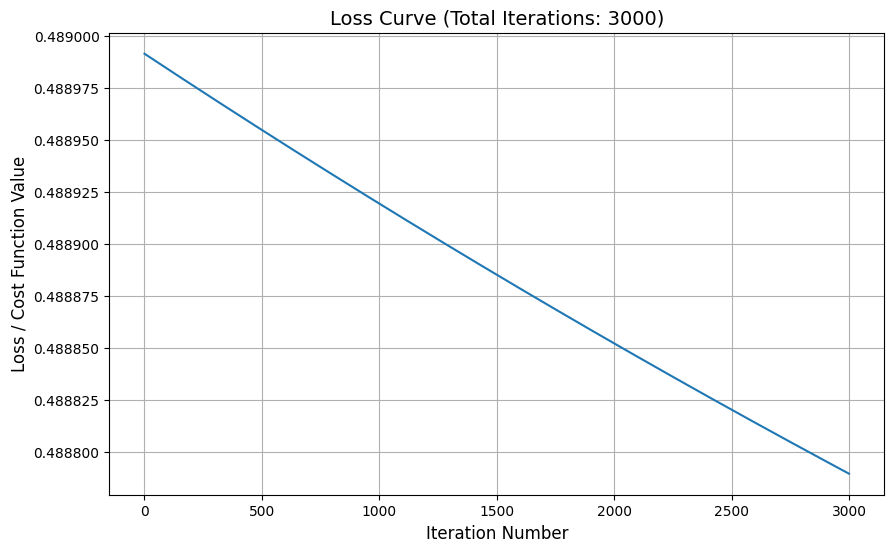

In [25]:
#Learning rate
lr = 1e-2
#First try with a low number and observe the loss plot so you get an idea of the gradient descent curve, usually it would fluctuate for lower num_iter  
num_iters = 3000

loss = gradient_descent(lr,num_iters)
print(f'Given the learning rate {lr} and the number of iterations {num_iters}, the max loss is {max(loss)}')
plot_loss_curve(loss,num_iters)

Now increase the learning rate and the number of iterations and see if the plot changes

Iteration: 5000,theta: [ 0.01431696 -0.00269268], db: 2.34e-05, dm: -1.194e-04, cost: 4.885e-01


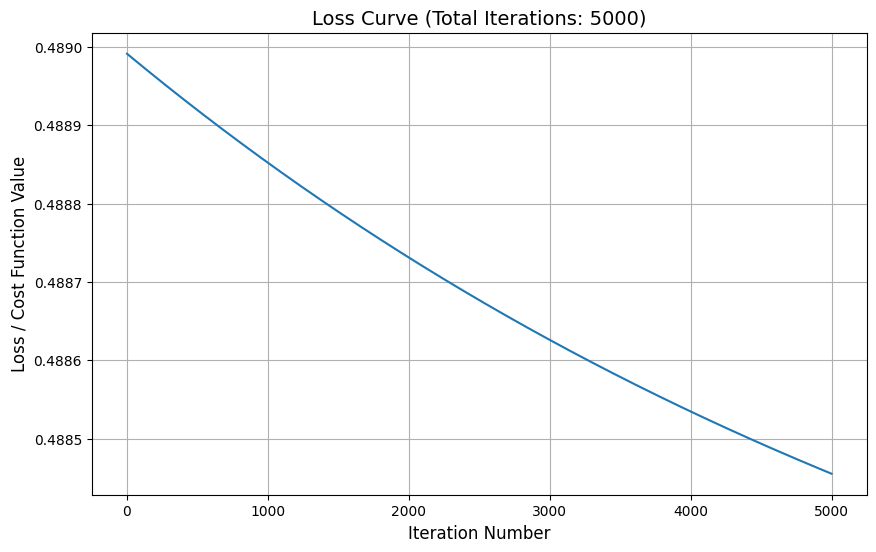

Given the learning rate 0.02 and the number of iterations 5000, the max loss is 0.48899119032307287


In [26]:
lr = 2e-2
num_iters = 5_000

loss = gradient_descent(lr,num_iters)
plot_loss_curve(loss,num_iters)
print(f'Given the learning rate {lr} and the number of iterations {num_iters}, the max loss is {max(loss)}')

Iteration: 20000,theta: [ 0.03641521 -0.00738083], db: 9.72e-06, dm: -4.146e-05, cost: 4.880e-01


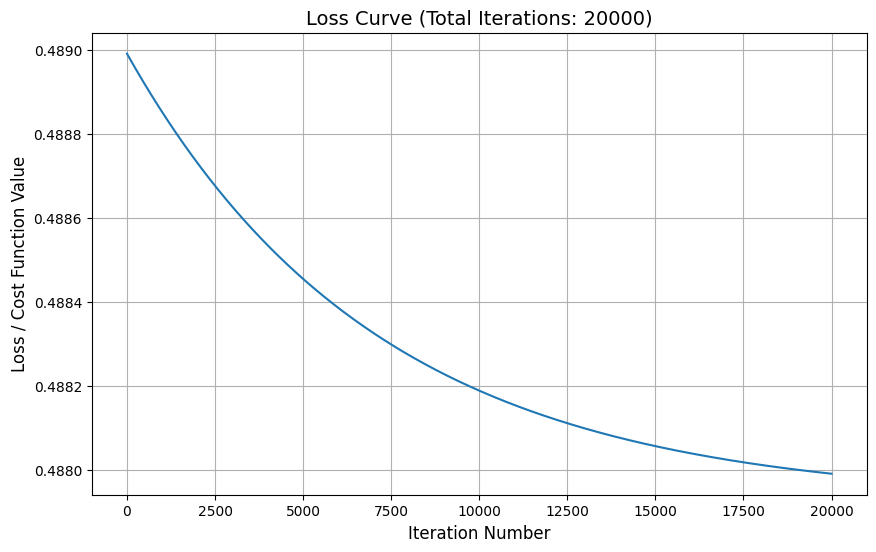

Given the learning rate 0.02 and the number of iterations 20000, the max loss is 0.48899119032307287


In [27]:
lr = 2e-2
num_iters = 20_000

loss = gradient_descent(lr,num_iters)
plot_loss_curve(loss,num_iters)
print(f'Given the learning rate {lr} and the number of iterations {num_iters}, the max loss is {max(loss)}')

Iteration: 35000,theta: [ 0.04821318 -0.01049363], db: 1.11e-09, dm: -2.762e-09, cost: 4.879e-01


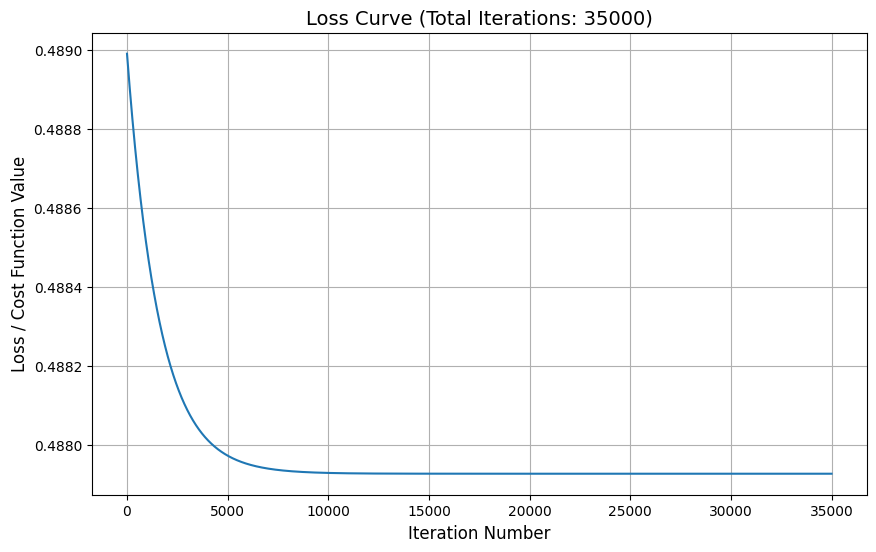

Given the learning rate 0.09 and the number of iterations 35000, the max loss is 0.4889906684687297


In [31]:
lr = 9e-2
num_iters = 35_000

loss = gradient_descent(lr,num_iters)
plot_loss_curve(loss,num_iters)
print(f'Given the learning rate {lr} and the number of iterations {num_iters}, the max loss is {max(loss)}')

## Conclusion:  
With different learning rate and iterations, we see the loss function can be minimized, although this is still not talking about a convergence, rather just looping over the number of iterations irrespective of the loss is incresing or decreasing. Ideally for convergence, the algorithm should stop as soon as the loss reaches a minimum (bottom of the bowl)